In [2]:
from constants import *
import glob
import os
import pandas as pd


In [3]:
storage_path = os.path.join(MMMKOSICE_STORAGE_PATH, HTML_PATH)
htmls = sorted(glob.glob(os.path.join(storage_path, "*")))

In [4]:
dfs = []
for file in htmls:

    year = int(os.path.basename(file).split(".")[0])

    df = pd.read_html(file, match="Priezvisko")
    assert len(df) == 2

    df[0]['Rocnik'] = year
    df[0]['Gender'] = "M"
    df[1]['Rocnik'] = year
    df[1]['Gender'] = "F"

    dfs.append(df[0])
    dfs.append(df[1])
dfs = pd.concat(dfs)


/tmp/ipykernel_4663/1806253220.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs = pd.concat(dfs)


In [5]:
dfs

,Poradie,Št. číslo,Priezvisko,Meno,Rok nar.,Klub,Štát,Cieľ. čas,Medzičas,Kategória,Rocnik,Gender
0,1.0,NaN,Halla,Karol,1899.0,KAC Košice,TCH (SVK),"3:01:35,0",NaN,M - 1.,1924,M
1,2.0,NaN,Schuller,Andrej,1900.0,Slávia Košice,TCH (SVK),"3:06:22,0",NaN,M - 2.,1924,M
2,3.0,NaN,Schmidt st.,František,NaN,12.horský prápor Levoča,TCH (SVK),"3:52:28,0",NaN,M - 3.,1924,M
3,4.0,NaN,Kulcsár,NaN,NaN,KAC Košice,TCH (SVK),"4:08:30,0",NaN,M - 4.,1924,M
4,5.0,NaN,Badonič,NaN,NaN,KAC Košice,TCH (SVK),"4:12:30,0",NaN,M - 5.,1924,M
...,...,...,...,...,...,...,...,...,...,...,...,...
654,NaN,3281,Gerényiová,Katarína,1981.0,NaN,SVK,DNF,1:57:55,Ž Z40,2023,F
655,NaN,3392,Czakóová,Kristína,1996.0,NaN,SVK,DNF,NaN,Ž,2023,F
656,NaN,421,Bacikova,Katarina,1989.0,Žilina,SVK,DNF,NaN,Ž,2023,F
657,NaN,6,Agai,Margaret,1988.0,NaN,KEN,DNF,1:29:24,Ž,2023,F


In [6]:
# standing, start_number, surname, first_name, birth_year, club, state, finish_time, half_time, race_year, gender. 
# DNF
clean = pd.DataFrame()
mapping = [
    ('standing', 'Poradie'),
    ('start_number', 'Št. číslo'),
    ('surname', 'Priezvisko'),
    ('first_name', 'Meno'),
    ('birth_year', 'Rok nar.'),
    ('club', 'Klub'),
    ('state', 'Štát'),
    ('race_year', 'Rocnik'),
    ('gender', 'Gender'),
]
for target_name, source_name in mapping:
    clean[target_name] = dfs[source_name]

clean['dnf'] = dfs['Cieľ. čas'] == "DNF"

def parse_time(time_str):
    if time_str != time_str or time_str in ["?", "DNF", "DNS"]:
        return float('nan')
    parts = time_str.split(":")
    assert len(parts) == 3, str(parts)
    h = parts[0]
    m = parts[1]
    s = parts[2]
    return int(h)*60*60 + int(m)*60 + float(s.replace(",","."))
    

clean['finish_time_s'] = dfs['Cieľ. čas'].apply(parse_time)
clean['mid_time_s'] = dfs['Medzičas'].apply(parse_time)

clean


,standing,start_number,surname,first_name,birth_year,club,state,race_year,gender,dnf,finish_time_s,mid_time_s
0,1.0,NaN,Halla,Karol,1899.0,KAC Košice,TCH (SVK),1924,M,False,10895.0,NaN
1,2.0,NaN,Schuller,Andrej,1900.0,Slávia Košice,TCH (SVK),1924,M,False,11182.0,NaN
2,3.0,NaN,Schmidt st.,František,NaN,12.horský prápor Levoča,TCH (SVK),1924,M,False,13948.0,NaN
3,4.0,NaN,Kulcsár,NaN,NaN,KAC Košice,TCH (SVK),1924,M,False,14910.0,NaN
4,5.0,NaN,Badonič,NaN,NaN,KAC Košice,TCH (SVK),1924,M,False,15150.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
654,NaN,3281,Gerényiová,Katarína,1981.0,NaN,SVK,2023,F,True,NaN,7075.0
655,NaN,3392,Czakóová,Kristína,1996.0,NaN,SVK,2023,F,True,NaN,NaN
656,NaN,421,Bacikova,Katarina,1989.0,Žilina,SVK,2023,F,True,NaN,NaN
657,NaN,6,Agai,Margaret,1988.0,NaN,KEN,2023,F,True,NaN,5364.0


In [1]:
print("Total starts:", len(dfs))

NameError: name 'dfs' is not defined

In [38]:
print("DNFS: ", sum(dfs['Cieľ. čas']=="DNF"))

DNFS:  3243


In [43]:
duplicates = dfs.duplicated(["Priezvisko", "Meno", "Rok nar."])
n_returned_starts = sum(duplicates)
n_first_timers = len(dfs) - n_returned_starts
print(f"First timers {n_first_timers}, returned: {n_returned_starts} ")


First timers 20669, returned: 26225 


In [49]:
finishers = dfs.query('`Cieľ. čas` != "DNF"')
unique_finishers = (~finishers.duplicated(
    ["Priezvisko", "Meno", "Rok nar."]))
sum(unique_finishers)

19586

In [52]:
finishers_sk = dfs.query('`Cieľ. čas` != "DNF" and `Štát`=="SVK"')
unique_finishers_sk = (~finishers_sk.duplicated(
    ["Priezvisko", "Meno", "Rok nar."]))
sum(unique_finishers_sk)

8504

In [66]:
states = dfs[~dfs.duplicated(
    ["Priezvisko", "Meno", "Rok nar."])].groupby("Štát").size().to_frame("size").sort_values("size", ascending=False)
states.head(20)

,size
Štát,
SVK,8211
TCH (SVK),3104
TCH (CZE),1933
POL,1623
CZE,1394
HUN,1082
GDR (GER),397
GBR,261
UKR,234


In [68]:
num_starts = dfs.groupby(["Priezvisko", "Meno", "Rok nar."]).size().to_frame("num_starts")
len(num_starts.query("num_starts > 1"))


7537

In [70]:
import matplotlib.pyplot as plt

In [75]:
num_starts.sort_values("num_starts", ascending=False).head(10)

num_starts
Priezvisko Meno      Rok nar.            
Polák      Peter     1948.0            47
           Vladimír  1958.0            42
Kriško     Miroslav  1957.0            40
Fotul      Juraj     1946.0            40
Tisza      Tibor     1957.0            40
Bačík      Peter     1953.0            40
Sciranko   Jozef     1961.0            38
Brandis    Pavol     1954.0            37
Chrenka    Jozef     1957.0            37
Gallik     František 1951.0            35

(array([1.8411e+04, 1.1120e+03, 2.7500e+02, 1.1700e+02, 4.5000e+01,
        3.7000e+01, 2.0000e+01, 6.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

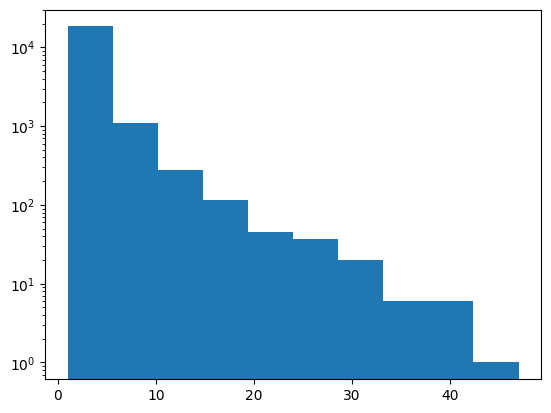

In [72]:
plt.hist(num_starts, log=True)

In [11]:
import constants

In [12]:
PARSED = constants.PARSED

AttributeError: module 'constants' has no attribute 'PARSED'

In [1]:
from constants import *
import glob
import os
import pandas as pd
from loguru import logger


def load_mmmkosice_as_df(files):
    dfs = []
    for file in files:

        year = int(os.path.basename(file).split(".")[0])

        df = pd.read_html(file, match="Priezvisko")
        assert len(df) == 2

        df[0]["Rocnik"] = year
        df[0]["Gender"] = "M"
        df[1]["Rocnik"] = year
        df[1]["Gender"] = "F"

        dfs.append(df[0])
        dfs.append(df[1])
    dfs = pd.concat(dfs)
    return dfs


def parse_time(time_str):
    if time_str != time_str or time_str in ["?", "DNF", "DNS"]:
        return float("nan")
    parts = time_str.split(":")
    assert len(parts) == 3, str(parts)
    h = parts[0]
    m = parts[1]
    s = parts[2]
    return int(h) * 60 * 60 + int(m) * 60 + float(s.replace(",", "."))


def clean_df(df):
    # standing, start_number, surname, first_name, birth_year, club, state, finish_time, half_time, race_year, gender.
    # DNF
    clean = pd.DataFrame()
    mapping = [
        ("standing", "Poradie"),
        ("start_number", "Št. číslo"),
        ("surname", "Priezvisko"),
        ("first_name", "Meno"),
        ("birth_year", "Rok nar."),
        ("club", "Klub"),
        ("state", "Štát"),
        ("race_year", "Rocnik"),
        ("gender", "Gender"),
    ]
    for target_name, source_name in mapping:
        clean[target_name] = df[source_name]

    clean["dnf"] = df["Cieľ. čas"] == "DNF"

    clean["finish_time_s"] = df["Cieľ. čas"].apply(parse_time)
    clean["mid_time_s"] = df["Medzičas"].apply(parse_time)

    return clean


def main():
    storage_path = os.path.join(MMMKOSICE_STORAGE_PATH, HTML_PATH)
    result_files = sorted(glob.glob(os.path.join(storage_path, "*")))
    logger.info("Loading")
    df = load_mmmkosice_as_df(result_files)
    logger.info("Cleaning")
    clean = clean_df(df)
    logger.info("Saving")
    clean_path = os.path.join(MMMKOSICE_STORAGE_PATH, PARSED)
    clean.to_csv(clean_path, index=False)


if __name__ == "__main__":
    main()


2024-10-05 20:18:22.366 | INFO     | __main__:main:68 - Loading
/tmp/ipykernel_12320/4196279939.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs = pd.concat(dfs)
2024-10-05 20:18:34.240 | INFO     | __main__:main:70 - Cleaning
2024-10-05 20:18:34.438 | INFO     | __main__:main:72 - Saving
